### Embedding 계층 구현

### 단어임베딩
http://doc.mindscale.kr/km/unstructured/11.html

In [1]:
import numpy as np

W = np.arange(21).reshape(7,3)
W

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14],
       [15, 16, 17],
       [18, 19, 20]])

In [2]:
W[2]

array([6, 7, 8])

In [3]:
W[5]

array([15, 16, 17])

In [4]:
# 행렬에서 특정 층을 추출
idx = np.array([1,0,3,0])
print('idx: ', idx)
print(W[idx])
W[[1,0,3,0]]  # Fancy Indexing

idx:  [1 0 3 0]
[[ 3  4  5]
 [ 0  1  2]
 [ 9 10 11]
 [ 0  1  2]]


array([[ 3,  4,  5],
       [ 0,  1,  2],
       [ 9, 10, 11],
       [ 0,  1,  2]])

In [5]:
class Embedding :
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.idx = None
    
    # 순전파
    def forward(self,idx):
        W, = self.params
        self.idx = idx
        out = W[idx]
        return out
    
    # 역전파
    def backward_1(self, dout):  # 먼저 쓰여진 값을 덮어쓴다 , 중복 문제 발생, 좋지 않은 구현
        dW, = self.grads
        dW[...] = 0
        dW[self.idx] = dout
        return None       

    def backward_2(self, dout):  # 중복 인덱스가 있어도 올바르게 처리 , for문 사용으로 속도가 느림
        dW, = self.grads
        dW[...] = 0
        for i, word_id in enumerate(self.idx):  # 4회, idx : [0,2,0,4]
            dW[word_id] += dout[i]
        return None       
    
    def backward(self, dout):  # 중복 인덱스가 있어도 올바르게 처리, 속도가 빠름
        dW, = self.grads
        dW[...] = 0
        np.add.at(dW, self.idx, dout)  # for문을 사용하지 않음
        return None       

In [6]:
W = np.arange(15).reshape(5,3)
print('W:\n', W)

e = Embedding(W)
idx = [0,2,0,4]

# 순전파 호출 : 순전파에서는 index가 중복되어도 문제 없음
out = e.forward(idx)
print('out:\n',out)

W:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
out:
 [[ 0  1  2]
 [ 6  7  8]
 [ 0  1  2]
 [12 13 14]]


In [7]:
# 역전파 호출 : backward_1
dout = np.arange(12).reshape(4,3) # 3: W.shape[1]와 같은 값이어야한다
print('dout:\n',dout)
print('grads:\n',e.grads)

# idx : [0,2,0,4]
e.backward_1(dout)    # 중복 문제 발생, 좋지 않은 구현
print('grads:\n',e.grads)

dout:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
grads:
 [array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])]
grads:
 [array([[ 6,  7,  8],
       [ 0,  0,  0],
       [ 3,  4,  5],
       [ 0,  0,  0],
       [ 9, 10, 11]])]


In [8]:
# 역전파 호출 : backward_2
dout = np.arange(12).reshape(4,3) # 3: W.shape[1]와 같은 값이어야한다
print('dout:\n',dout)
print('grads:\n',e.grads)

# idx : [0,2,0,4]
e.backward_2(dout)    # 중복 인덱스가 있어도 올바르게 처리
print('grads:\n',e.grads)

dout:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
grads:
 [array([[ 6,  7,  8],
       [ 0,  0,  0],
       [ 3,  4,  5],
       [ 0,  0,  0],
       [ 9, 10, 11]])]
grads:
 [array([[ 6,  8, 10],
       [ 0,  0,  0],
       [ 3,  4,  5],
       [ 0,  0,  0],
       [ 9, 10, 11]])]


In [9]:
# 역전파 호출 : backward
dout = np.arange(12).reshape(4,3) # 3: W.shape[1]와 같은 값이어야한다
print('dout:\n',dout)
print('grads:\n',e.grads)

# idx : [0,2,0,4]
e.backward(dout)    # 중복 인덱스가 있어도 올바르게 처리, 속도가 빠름
print('grads:\n',e.grads)

dout:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
grads:
 [array([[ 6,  8, 10],
       [ 0,  0,  0],
       [ 3,  4,  5],
       [ 0,  0,  0],
       [ 9, 10, 11]])]
grads:
 [array([[ 6,  8, 10],
       [ 0,  0,  0],
       [ 3,  4,  5],
       [ 0,  0,  0],
       [ 9, 10, 11]])]


In [10]:
# np.add.at(A,idx,B) : A배열의 idx 위치에 B배열의 원소 순서대로 더하기, A값 변함
# https://rfriend.tistory.com/m/545

A = np.arange(18).reshape(6, 3)
print('A:\n',A)
B = np.arange(12).reshape(4, 3)
print('B:\n',B)
idx = np.array([0, 0, 3, 5])
np.add.at(A, idx, B)

print('result:\n',A)

A:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]]
B:
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
result:
 [[ 3  6  9]
 [ 3  4  5]
 [ 6  7  8]
 [15 17 19]
 [12 13 14]
 [24 26 28]]


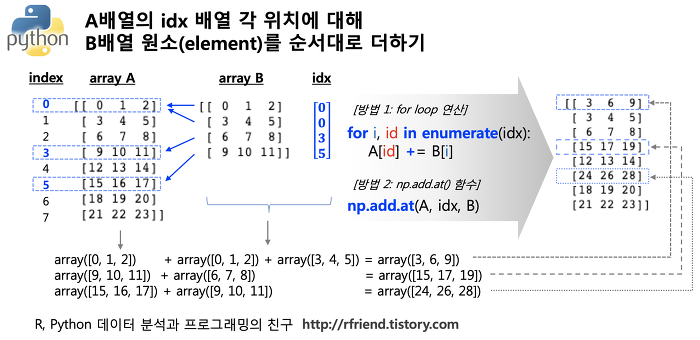